<a href="https://colab.research.google.com/github/anubhavgupta1/DeepLearning/blob/master/12_PyTorch_Convolution_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation


In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [135]:
import torchvision # used for computer vision tasks
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor()) 

Files already downloaded and verified


In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') # 0 1 2 3 4 5 6 7 8 9

In [0]:
# 6000 images 5 batches of training = 5000 1 batch of test = 1000

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True) # loads 4 images from trainset which are shuffled randomly; 5000/4 = 1250 batches

In [139]:
dataiter = iter(trainloader) # iter function will iterate over trainloader
images, labels = dataiter.next() # it will return next instance(batch) of 4 images

print(images.shape)

print(images[0].shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([3, 32, 32])
2


## Visualise data

In [140]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [141]:
# for plotting we need to conver tensor into numpy
npimg = img.numpy()
print(npimg.shape) # x =0, y = 1 , z = 2

(3, 32, 32)


In [142]:
# for plotting we need to transpose it; transpose means to flip the rows and columns
npimg = np.transpose(npimg, (1, 2, 0)) # y z z
print(npimg.shape)

(32, 32, 3)


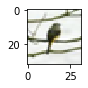

In [143]:
plt.figure(figsize = (1,1)) # 32 x 32 ---> 1 x 1
plt.imshow(npimg)
plt.show()

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize = (4,4))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

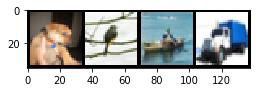

dog bird ship truck


In [145]:
# it will make one image of 4 images and each image image will be shown in individual frame; 
# makes a singe grid out of a provided tensor containing a list of images of the same size
imshow(torchvision.utils.make_grid(images)) 
print(' '.join(classes[labels[j]] for j in range(4))) #print actual labels

## Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3) #param1 = 3 which is no. of input channels(RGB); param2 = 16 no of output channels param3 = f = 3 (3 x 3 x 16)   ; k = 16
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net = FirstCNN()

In [148]:
out = net(images)
out.shape # wo = wi - f + 1 ; 32 - 3 + 1 = 30

torch.Size([4, 16, 30, 30])

In [149]:
for param in net.parameters(): # output channels = 16, channel depth = 3 , filter size = 3 x 3  + bias for each kernel => total bias weight = 16
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [150]:
out1 = out[0, 0, :, :].detach().numpy() # 0th batch 0th channel all 30 x 30
print(out1.shape)

(30, 30)


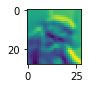

In [180]:
plt.figure(figsize = (1,1))
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

In [0]:
import torch.nn as nn

class FirstCNN_1(nn.Module):
    def __init__(self): 
        super(FirstCNN_1, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride = (2,2)) 
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net1 = FirstCNN_1()

In [188]:
out1 = net1(images)
out1.shape # ((wo = wi - f + 2P)/s) + 1 ; padding(1,1 ) ==> 32 x32 stride(2,2) ==> 16 x 16 

torch.Size([4, 16, 16, 16])

In [189]:
for param in net1.parameters(): # output channels = 16, channel depth = 3 , filter size = 3 x 3  + bias for each kernel => total bias weight = 16
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [190]:
out11 = out[0, 0, :, :].detach().numpy() # 0th batch 0th channel all 30 x 30
print(out11.shape)

(28, 28)


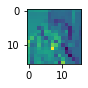

In [191]:
plt.figure(figsize = (1,1))
plt.imshow(out1[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30) ; N is batch size here
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [153]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

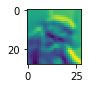

In [192]:
plt.figure(figsize = (1,1))
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [156]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

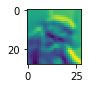

In [193]:
plt.figure(figsize = (1,1))
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1) # flattening of vector
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [159]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [160]:
print(out)

tensor([[ 0.0938, -0.0766,  0.0564, -0.0176, -0.0499,  0.0889,  0.0524, -0.1082,
          0.0879, -0.0391],
        [ 0.0619, -0.0905,  0.0793, -0.0082, -0.0213,  0.1168,  0.0321, -0.1196,
          0.0391, -0.0559],
        [ 0.0563, -0.0911,  0.0776,  0.0081, -0.0480,  0.1073,  0.0403, -0.1033,
          0.0463, -0.0343],
        [ 0.0574, -0.0898,  0.0670, -0.0021, -0.0438,  0.0911,  0.0565, -0.1025,
          0.0403, -0.0337]], grad_fn=<AddmmBackward>)


In [161]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([0, 5, 5, 5])


## Training LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [163]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())# here we have not defined any hyperparameters like learning rate so it will work on default values

Epoch: 0/16, Test acc: 37.96, Train acc: 38.51
Epoch: 1/16, Test acc: 43.42, Train acc: 44.17
Epoch: 2/16, Test acc: 47.44, Train acc: 48.37
Epoch: 3/16, Test acc: 49.92, Train acc: 52.01
Epoch: 4/16, Test acc: 52.12, Train acc: 54.25
Epoch: 5/16, Test acc: 52.83, Train acc: 56.03
Epoch: 6/16, Test acc: 53.83, Train acc: 57.37
Epoch: 7/16, Test acc: 54.11, Train acc: 58.62
Epoch: 8/16, Test acc: 54.63, Train acc: 59.47
Epoch: 9/16, Test acc: 55.04, Train acc: 61.29
Epoch: 10/16, Test acc: 55.44, Train acc: 62.16
Epoch: 11/16, Test acc: 55.60, Train acc: 62.54
Epoch: 12/16, Test acc: 56.06, Train acc: 63.58
Epoch: 13/16, Test acc: 56.27, Train acc: 65.02
Epoch: 14/16, Test acc: 55.53, Train acc: 64.61
Epoch: 15/16, Test acc: 55.95, Train acc: 66.21


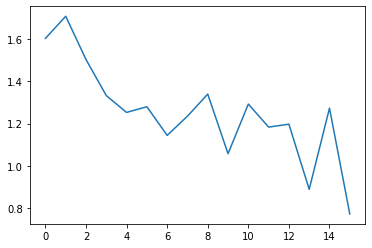

CPU times: user 10min 2s, sys: 6.66 s, total: 10min 8s
Wall time: 10min 10s


In [167]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step() # updation of parameters
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [168]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [171]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 5min 34s, sys: 5.09 s, total: 5min 39s
Wall time: 5min 40s


In [172]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 56.55, Train acc: 66.25


## Basic Visualisation

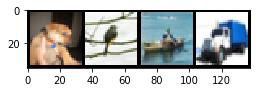

In [173]:
imshow(torchvision.utils.make_grid(images))

In [0]:
net = net.to('cpu')

In [175]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [176]:
out = net.cnn_model[0](images) # first layer
out.shape

torch.Size([4, 6, 28, 28])

<Figure size 72x72 with 0 Axes>

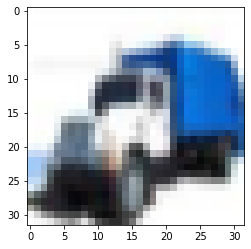

In [197]:
image_id = 3
plt.figure(figsize = (1,1))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


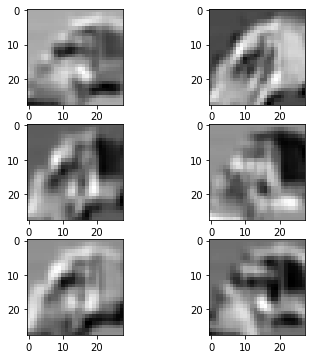

In [199]:
plt.figure(figsize = (6,6))
plt.subplot(321) # 3 rows and 2 coulumns
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()